Physics 474 - Spring 2023 <br>

Homework 4 - Solving PDE and ODE boundary value problems with the relaxation method 

Using the Gauss-Seidel overrelaxation method


<font color='red'>Author: RJ Young






___________________________________________________________________________________________________________
In this problem we will solving for the electric potential $\phi(\vec{r})$ and electric field $\vec{E}(x,y)$ in a cylindrical configuration, similar to a coax cable, with fixed voltages on the inner conductor and outer conductor. See figure.

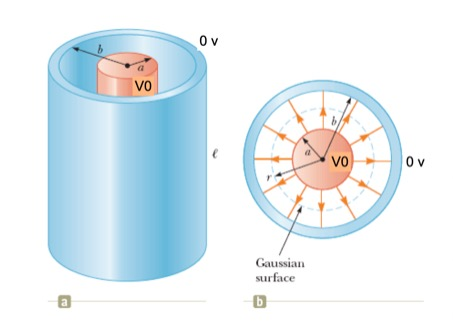



_________________________________________________________________________________
Part a: (10 points)

Poisson's equation in 2-D for electric potential $\phi$ in empty space with boundry conditions.

$\nabla^2 \phi(x,y) = 0$

or,

$\frac{\partial^2 \phi(x,y)}{\partial x ^2}+\frac{\partial^2 \phi(x,y)}{\partial y ^2}=0$

From our lecture we saw that we can use a space-centered finite difference method with grid spacing $a$ for second partial derivatives that yields the approximation

 $\Large \nabla^2 \phi(x,y)\approx \frac{\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)}{a^2} +
\frac{\phi(y+a,t)+\phi(y-a,t)-2\phi(y,t)}{a^2}$

Setting this equal to zero for the Poisson equation we get

$\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=0$

or 

$\phi(x,y) = \frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)\right]$

These are a set of $n \times n$ simulataneous which could be solved holding the boundary boints at their fixed values.

we will use an iterative method that we call **The Relaxation Method** to solve this set of equations

We will use the **Gauss-Seidel overrelaxation method (see lecture and examples)**

- Fix $\phi(x,y)$ at boundaries for every iteration
- guess some initial values for $\phi(x,y)$
- apply GS-Overrelaxation equation with weight $w<1.0$ to update values on all grid points $\phi(x,y) \leftarrow \frac{(1+w)}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)\right]-w \phi(x,y)$
- NOTE: The array on the left is the same as on the right in the implementation, that is the Gauss-Seidel part.
- take these new values and feed them back into right hand side
- Calculate another new set of values, again and again and …
- Until $\phi(x,y)$ settles down (i.e. relaxes) to a fixed value. That is the solution!
___________________________________________________________________________________

The parameters of the coax are:
- radius of the inner conductor is $a = 1\,mm$
- radius of the outer conductor is $b = 6\,mm$
- electric potential (i.e. voltage) on the inner conductor is $V0 =  100 \, v$
- electric potential  on the outer conductor is $0 \, v$

for the Gauss-Seidel overrelaxation  method use:
- overrelaxation weighting factor $w=0.92$
- termination when  max difference between iterations is 1e-8 or iterations = 2500
- pick a 2D grid from $-0.007$ mm to $+0.007$ mm for both $x,y$
- use (2n+1)x(2n+1) grid points so the center point is at 0 and it is symmetric on either side (start with n=50)
- investigate different n (maybe 25 and 100)


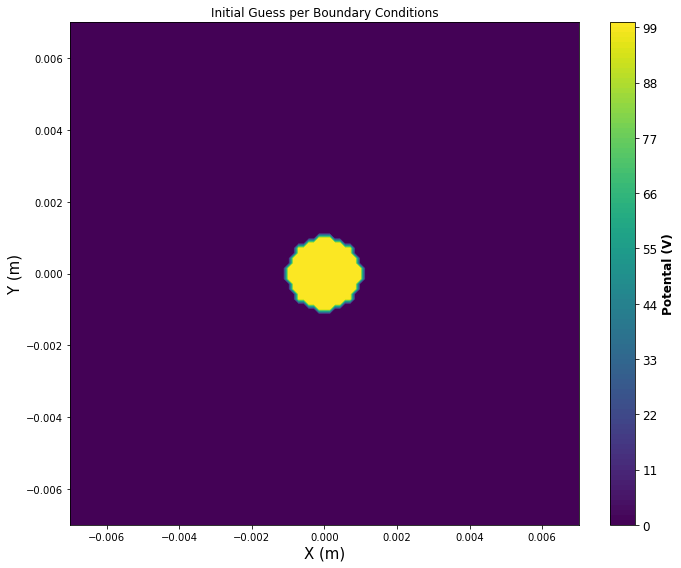

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [29]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
s = 0.007

x = np.linspace(-s,s,2*n+1)
y = np.linspace(-s,s,2*n+1)

X,Y = np.meshgrid(x,y)

maxsteps = 2500
tol = 1e-8
w = 0.92

def cyl_bound(pot):
    on_bd = np.copy(pot)
    on_bd[:,:]=False
    
    a = 0.001
    b = 0.006
    V0 = 100
    V_out = 0
        
    for i in range(2*n+1):
        for j in range(2*n+1):
            if np.sqrt(x[j]**2 + y[i]**2) <= a:
                on_bd[i,j] = True
                pot[i,j] = V0               
            elif b <= np.sqrt(x[j]**2 + y[i]**2):
                pot[i,j] = V_out
                on_bd[i,j] = True
            else:
                pass
            
    return pot,on_bd
    
p_init = np.zeros((2*n+1,2*n+1))
p,on_bd = cyl_bound(p_init)
p_rel = np.copy(p)
    
plt.figure(figsize=(10,8))
plt.contourf(X,Y,p,2*n+1)
cb = plt.colorbar()
cb.set_label(label='Potental (V)', size='large', weight='bold')
cb.ax.tick_params(labelsize='large')
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Y (m)',fontsize=15)
plt.title('Initial Guess per Boundary Conditions')
plt.tight_layout()
plt.show()

change = 10000

it = 0  
while change>tol and it < maxsteps:
    for i in range(1,2*n): 
        for j in range(1,2*n): 
            if on_bd[j,i] == False:
                p[i,j] = (1+w)*(p[i+1,j]+p[i-1,j]+p[i,j+1]+p[i,j-1])/4 - (w*p[i,j])
                
    differences = np.abs((p_rel-p))
    ind_max = np.unravel_index(np.argmax(differences),differences.shape)
    maxdiff = differences[ind_max]
    
    p_rel = np.copy(p)
    if it%250 == 0:
        print('Iteration: ' + str(it))
    it += 1 

print('Relaxation Loop Complete')

_________________________________________________________
Part b: (5 points)

- Plot the equipotential contours using 'contourf' and showing a colorbar
- Calculate (using numpy gradient) and Plot (using matplotlib quiver) the Electric field $\vec{E}$
- You may want to skip every some number of points for quiver...

where,

$\vec{E} = -\nabla \phi = -\left(\frac{\partial \phi(x,y)}{\partial x }\hat{x}+\frac{\partial \phi(x,y)}{\partial y }\hat{y}\right)$



__________________________________________________________

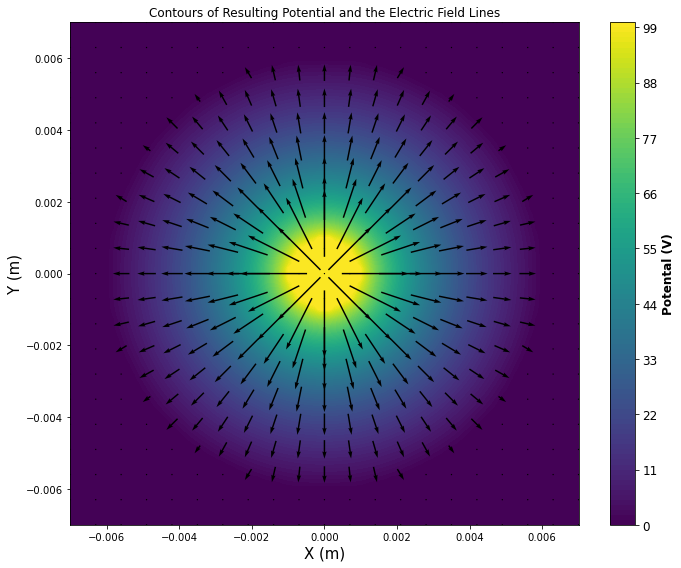

In [28]:
plt.figure(figsize=(10,8))
plt.contourf(X,Y,p,2*n+1)
cb = plt.colorbar()
cb.set_label(label='Potental (V)', size='large', weight='bold')
cb.ax.tick_params(labelsize='large')
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Y (m)',fontsize=15)
plt.title('Contours of Resulting Potential and the Electric Field Lines')
v,u = np.gradient(p) #get the gradient of potential E=-grad(p)
skip=np.int_(5) #number of points to skip in plotting gradient
plt.quiver(X[::skip,::skip],Y[::skip,::skip],
           -u[::skip,::skip],-v[::skip,::skip],pivot='mid') #plot E field

plt.tight_layout()
plt.show()

_____________________________________________________________________
Part c: (5 points)

In this part we are going to examine the accuracy of the solution.

This problem has a simple analytic solution. Due to the nature of the cylindrical symmetry we can use Gauss' Law  to calculate the Electric field, which is radial only, and the work-energy theorem to calculate the potential that is only a function of the radius $r$. 

The solutions are:

for $a < r < b$ 

$\large \phi = \phi(r) = V0 \, \frac{log(r/b)}{log(a/b)}$ 

$\large \vec{E}= \frac{V0}{r} \frac{\hat{r}}{-log(a/b)}$ 

for $r \leq a$

$\phi = V0$ and $\vec{E}=0$

for $r \geq b$

$\phi = 0$ and $\vec{E}=0$


Since there is radial symmetry we will compare the numeric solution to the analytic solution along the positive x-axis only.

1) Figure 1: Plot the two solutions for the potential $\phi$ vs x for $0\leq x \leq 0.007$
2) Figure 2: Make a plot with 2 subplots a) both potentials $\phi$ and b) difference in potentials vs x for $a <x < b$
3) Figure 3: Make a plot with 2 subplots a) both $|\vec{E}|$ and b) difference in $|\vec{E}|$ vs x for $a <x < b$
_____________________________________________________________________

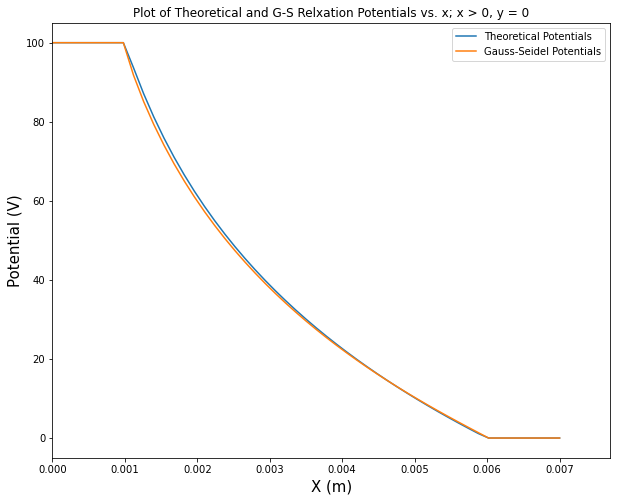

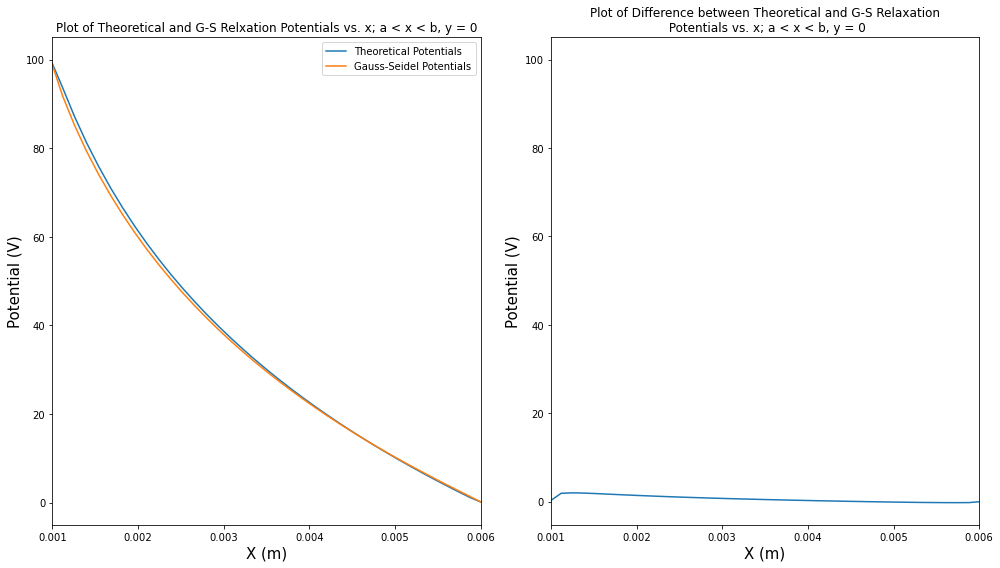

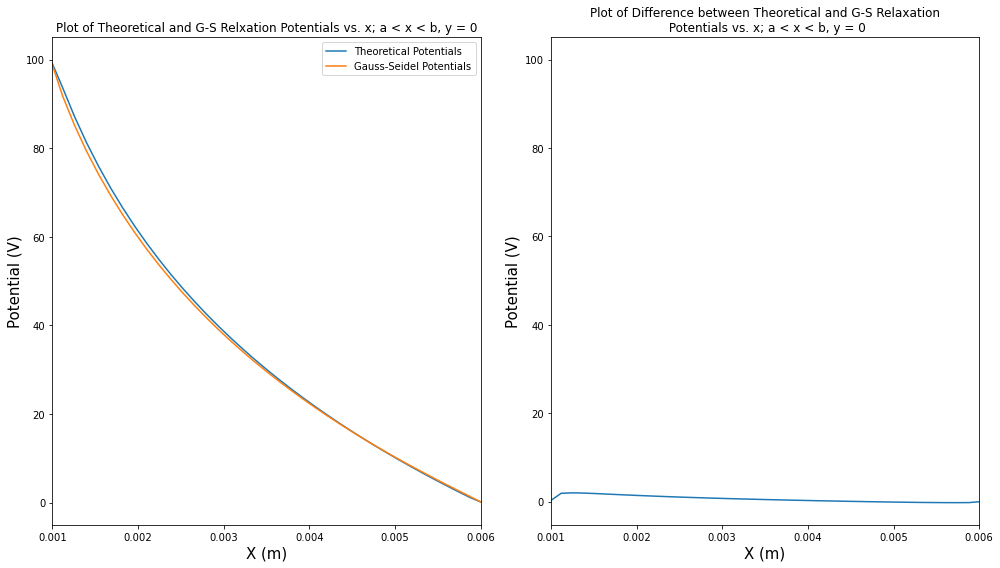

In [47]:
a = 0.001
b = 0.006
V0 = 100
V_out = 0

p_thry = np.zeros(2*n+1)
E_thry = np.copy(p_thry)

for i in range(2*n+1):
    r = x[i]
    if a < r < b:
        p_thry[i] = V0*np.log(r/b)/np.log(a/b)
        E_thry[i] = V0/r
    elif r <= a:
        p_thry[i] = V0
        E_thry[i] = 0
    else:
        p_thry[i] = 0
        E_thry[i] = 0
        
p_GS = p[n+1,:]
E_GS = 0

p_diff = p_thry - p_GS
E_diff = 0

#Figure 1
plt.figure(figsize = (10,8))
plt.plot(x,p_thry,label='Theoretical Potentials')
plt.plot(x,p_GS,label='Gauss-Seidel Potentials')
plt.xlim(0)
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Potential (V)',fontsize=15)
plt.legend()
plt.title('Plot of Theoretical and G-S Relxation Potentials vs. x; x > 0, y = 0')

#Figure 2
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.plot(x,p_thry,label='Theoretical Potentials')
plt.plot(x,p_GS,label='Gauss-Seidel Potentials')
plt.xlim((a,b))
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Potential (V)',fontsize=15)
plt.legend()
plt.title('Plot of Theoretical and G-S Relxation Potentials vs. x; a < x < b, y = 0')

plt.subplot(1,2,2)
plt.plot(x,p_diff,label='Theoretical Potentials')
plt.xlim((a,b))
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Potential (V)',fontsize=15)
plt.title('Plot of Difference between Theoretical and G-S Relaxation\n Potentials vs. x; a < x < b, y = 0')
plt.tight_layout()
plt.show()

#Figure 3
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.plot(x,p_thry,label='Theoretical Potentials')
plt.plot(x,p_GS,label='Gauss-Seidel Potentials')
plt.xlim((a,b))
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Potential (V)',fontsize=15)
plt.legend()
plt.title('Plot of Theoretical and G-S Relxation Potentials vs. x; a < x < b, y = 0')

plt.subplot(1,2,2)
plt.plot(x,p_diff,label='Theoretical Potentials')
plt.xlim((a,b))
plt.xlabel('X (m)',fontsize=15)
plt.ylabel('Potential (V)',fontsize=15)
plt.title('Plot of Difference between Theoretical and G-S Relaxation\n Potentials vs. x; a < x < b, y = 0')
plt.tight_layout()
plt.show()

_________________________________________________________
Observations and Summary




___________________________________________________________